# i3a  -  Clase 3

# Índice
1. [Transformaciones](#tl)
    1. [Producto Vector Matriz](#pmv)
    2. [Funciones de activación](#act)
2. [Redes Neuronales](#nn)
    1. [Keras](#keras)
3. [Imágenes sin entrenamiento](#untr)
4. [Playground](#playground)
5. [MNIST](#mnist)
    1. [Maximización de Activación](#ma)

In [ ]:
# instalar las dependencias si son necesarias
# !pip install tensorflow
# !pip install keras
# !apt install graphviz
# !pip install pydot pydot-ng

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot, plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras

from IPython.display import Image

# en Colab usar esto !wget https://gitlab.com/i3a/clases/raw/master/utils.py -O utils.py
from utils import mosaic

plt.rcParams['font.size']=20
plt.rcParams['figure.figsize']=(8,6)

def sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

Using TensorFlow backend.


# Transformaciones <a name="tl"></a>
## Producto Matriz Vector <a name="pmv"></a>

$y = M \cdot x$

$x$ vector, $y$ vector y $M$ matriz

### Repaso productos entre vectores y matrices

In [3]:
np.array([0,1,2])@np.array([1,2,3])
# 8

np.array([[0,1,2]])@np.array([[1,2,3]]).T
# array([[8]])

np.array([[0,1,2]]).T@np.array([[1,2,3]])
# array([[0, 0, 0],
#        [1, 2, 3],
#        [2, 4, 6]])

# Matriz M
M = np.array([[1,1,1],
              [-1,0,1]])

# Colapsa un vector de dimensión 3 en un vector de dimensión 2
M@np.array([[1,2,3]]).T

# array([[6],
#        [2]])

array([[6],
       [2]])

## Ejemplo

In [4]:
N = 50
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
x_ = x.reshape((x.size,1))
y_ = y.reshape((x.size,1))

# Vector x y Vector y
X = np.hstack((x_,y_))
X

array([[-1.        , -1.        ],
       [-0.95918367, -1.        ],
       [-0.91836735, -1.        ],
       ...,
       [ 0.91836735,  1.        ],
       [ 0.95918367,  1.        ],
       [ 1.        ,  1.        ]])

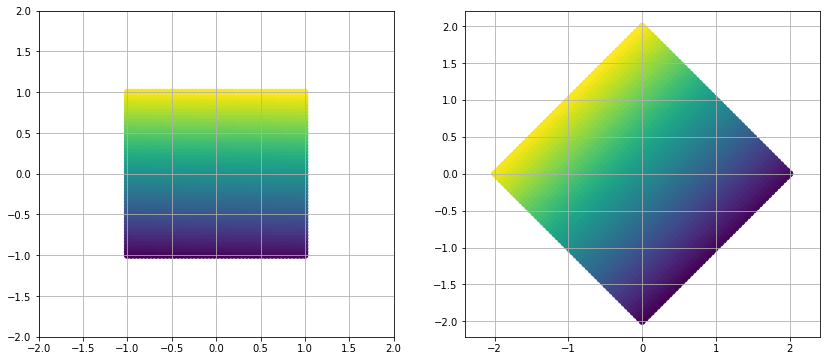

In [5]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],c=range(len(X)));
# plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()

# Matriz M
M = np.array([[1,1],
              [-1,1]])

# Producto Vector Matriz
h = X@M
# h = (M.T@X.T).T

plt.subplot(1,2,2)
plt.scatter(h[:,0], h[:,1],c=range(len(X)));
plt.axis('equal')
plt.grid()

## Funciones de activación  <a name="act"></a>

![texto alternativo](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

La operación principal será transformar un vector con una matriz, desplazarse y luego aplicarle una función de activación no lineal

$y = \sigma(M \cdot x + b)$

$x$ vector, $y$ vector, $M$ matriz, $b$ vector, $\sigma$ función de activación

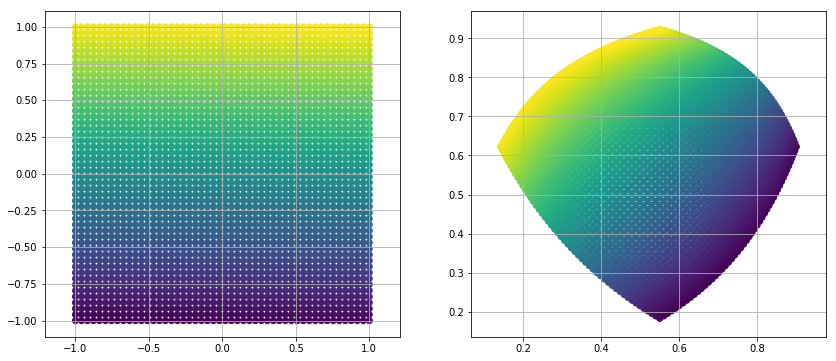

In [6]:
M = np.array([[1,1],
              [-1,1]])

b = [0.2,0.5]

h = sigmoid(X@M+b)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],c=range(len(X)));
plt.axis('equal')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(h[:,0], h[:,1],c=range(len(X)));
plt.axis('equal')
plt.grid()

Aplicación reiterada de dicha transformación

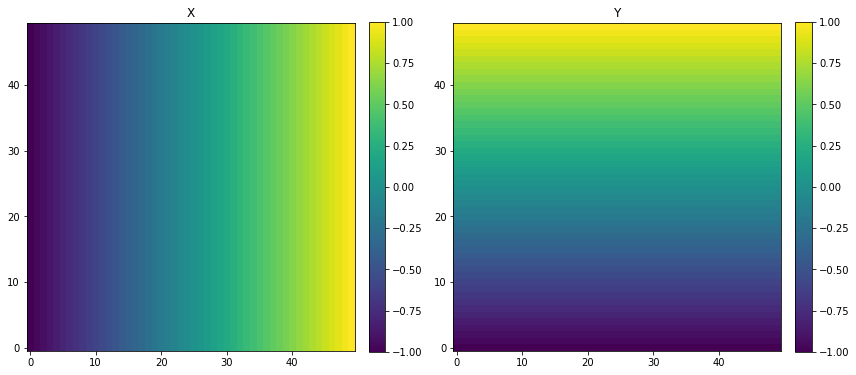

interactive(children=(FloatSlider(value=0.0, description='m1', max=4.0, min=-4.0, step=0.01), FloatSlider(valu…

In [7]:
N = 50
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
x_ = x.reshape((x.size,1))
y_ = y.reshape((x.size,1))
X = np.hstack((x_,y_))

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
im = plt.imshow(x,origin='bottom')
plt.title('X')
plt.colorbar(im,fraction=0.046, pad=0.04);
plt.subplot(1,2,2)
im = plt.imshow(y,origin='bottom');
plt.title('Y')
plt.colorbar(im,fraction=0.046, pad=0.04);
plt.tight_layout()
plt.show()

fnl = sigmoid
def interactive_function(m1,m2,m3,m4,b1,b2,reps):
    M = np.array([[m1,m2],
                 [m3,m4]])
    b = [b1,b2]
    h = fnl(X@M)
    for i in range(reps):
        h = fnl(h@M+b)
        
    x = h[:,0].reshape((N,N))
    y = h[:,1].reshape((N,N))

    print(M)
    print(b)
    
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    im = plt.imshow(x,origin='bottom')
    plt.title('X')
    plt.colorbar(im,fraction=0.046, pad=0.04);
    plt.subplot(1,2,2)
    im = plt.imshow(y,origin='bottom');
    plt.title('Y')
    plt.colorbar(im,fraction=0.046, pad=0.04);
    plt.tight_layout()
    
interactive_plot = interactive(interactive_function,m1=(-4,4,0.01),m2=(-4,4,0.01),m3=(-4,4,0.01),m4=(-4,4,0.01),b1=(-4,4,0.01),b2=(-4,4,0.01), reps=(0,10,1) )
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot


# Redes Neuronales  <a name="nn"></a>

![image.png](https://blog.webkid.io/content/images/old/neural-networks-in-javascript/nn_blog.png)

\begin{equation}
h = \sigma(W_1 \cdot X +b_1)\\
y = \sigma(W_2 \cdot h +b_2)\\
h = \sigma\left(\begin{bmatrix}. & . & .\\ 
. & . & .\\ 
. & . & .\\ 
. & . & .\\ 
. & . & .
\end{bmatrix} \cdot \begin{bmatrix}.\\ 
.\\
. 
\end{bmatrix}+\begin{bmatrix}. & . & . & . & .
\end{bmatrix}\right)\\
y = \sigma\left(
\begin{bmatrix}
. & . & . & . & .\\ 
. & . & . & . & .
\end{bmatrix} \cdot \begin{bmatrix}
.\\ 
.\\
.\\ 
.\\
.\\
\end{bmatrix} + \begin{bmatrix}
.\\ 
.\\
. 
\end{bmatrix} \right)
\end{equation}

## Keras  <a name="keras"></a>
![](https://cdn-images-1.medium.com/max/1200/1*2HET8vYbgkgDsAkqs1C0jQ.png)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


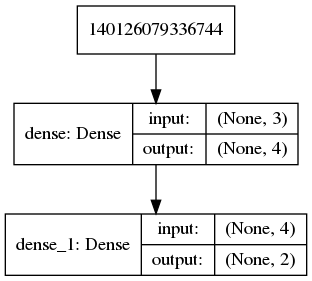

In [8]:
model = Sequential()
model.add( Dense(5,input_shape=(3,)) )
model.add( Dense(2) )
model.summary()
plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

In [9]:
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
print(W1)
print(W2)
print(b1)
print(b2)

[[-0.7897062  -0.62383217  0.1854142  -0.21909308]
 [-0.3443662  -0.5094769   0.56314194 -0.72445667]
 [-0.24640948  0.80612695 -0.49690577 -0.495124  ]]
[[ 0.26461196 -0.2464068 ]
 [-0.3363204   0.31954885]
 [ 0.54497075 -0.73398924]
 [ 0.08839297 -0.5119672 ]]
[0. 0. 0. 0.]
[0. 0.]


# Generando imágenes sin entrenar  <a name="untr"></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1024      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1024      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1024      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


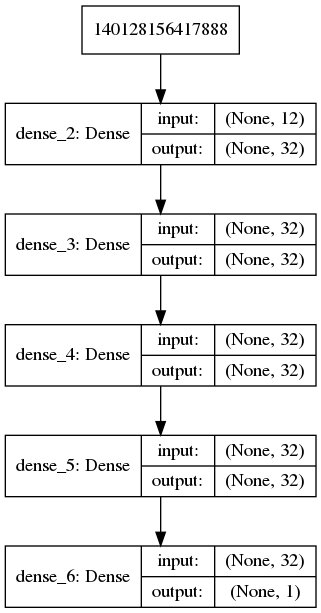

In [10]:
z_dim = 10
xy_dim = 2
dims = z_dim+xy_dim
image_channels = 1

layer_size = 32

initializer = RandomNormal(mean=0.0, stddev=1.0, seed=None)

model = Sequential()
model.add( Dense(layer_size, activation="tanh", kernel_initializer=initializer, use_bias=False, input_shape=(dims,) ) )

for i in range(3):
    model.add( Dense(layer_size, activation="tanh", kernel_initializer=initializer, use_bias=False ) )

model.add( Dense(image_channels, activation="sigmoid" ) )

model.summary()
plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

In [11]:
z = np.random.normal( size=(z_dim,) )

X = np.hstack( (z, [0,0]) ).reshape(1,dims)

model.predict(X)

array([[0.89633965]], dtype=float32)

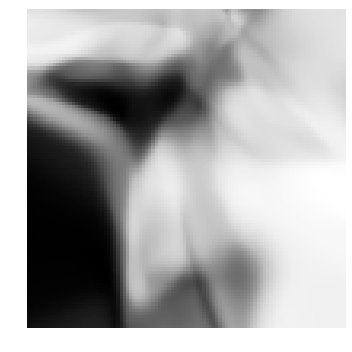

In [13]:
N = 100
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
x_ = x.reshape((x.size,1))
y_ = y.reshape((x.size,1))

z = np.random.normal( size=(z_dim,) )
z = np.tile(z,N*N).reshape(N*N,-1)

X = np.hstack( (z, x_, y_) )

y = model.predict(X)
y = y.reshape(N,N,image_channels)

plt.figure(figsize = (5,5))
plt.imshow(np.squeeze(y), cmap="Greys")
plt.axis("off")
plt.tight_layout()

# Playground  <a name="playground"></a>

[Tensorflow PlayGround](https://playground.tensorflow.org/)


# Red densa con MNIST  <a name="mnist"></a>
## Dataset

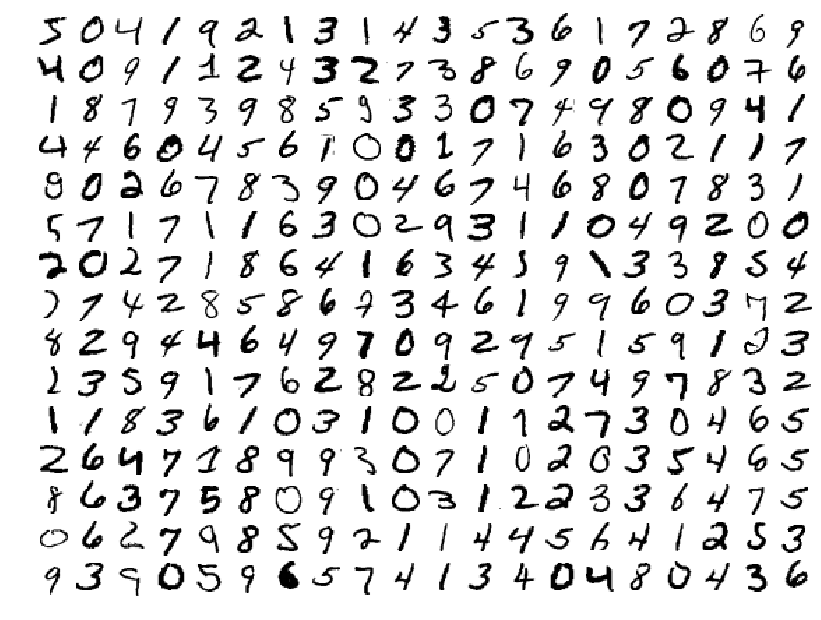

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width, img_height = x_train[0].shape
num_classes = 10

plt.figure(figsize=(14,14))
plt.imshow(mosaic(x_train[:300],20),cmap=plt.cm.gray_r)
plt.axis('off');

## Pre procesado

In [4]:
# Reshaping y normalizando
x_train = x_train.reshape(x_train.shape[0], img_width*img_height)
x_test = x_test.reshape(x_test.shape[0], img_width*img_height)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# La variable y target se convierte a one hot encoding
# 0 -> [1,0,0,0,0,0,0,0,0,0]
# 1 -> [0,1,0,0,0,0,0,0,0,0]
# 9 -> [0,0,0,0,0,0,0,0,0,1]

y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


## Construcción de la red

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


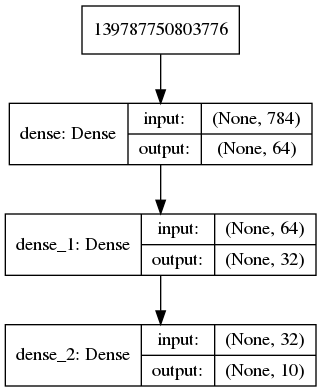

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(img_width*img_height,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

score_train = model.evaluate(x_test, y_test_one_hot, verbose=0)
plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

## Entrenamiento

In [ ]:
model.save_weights()

In [6]:
batch_size = 128
epochs = 8

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=.33)

Train on 40199 samples, validate on 19801 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8
40199/40199 [==============================] - 1s 33us/sample - loss: 0.5110 - acc: 0.8579 - val_loss: 0.2537 - val_acc: 0.9273
Epoch 2/8
40199/40199 [==============================] - 1s 30us/sample - loss: 0.2146 - acc: 0.9390 - val_loss: 0.1989 - val_acc: 0.9444
Epoch 3/8
40199/40199 [==============================] - 1s 29us/sample - loss: 0.1626 - acc: 0.9531 - val_loss: 0.1775 - val_acc: 0.9469
Epoch 4/8
40199/40199 [==============================] - 1s 27us/sample - loss: 0.1310 - acc: 0.9624 - val_loss: 0.1616 - val_acc: 0.9534
Epoch 5/8
40199/40199 [==============================] - 1s 30us/sample - loss: 0.1090 - acc: 0.9694 - val_loss: 0.1476 - val_acc: 0.9566
Epoch 6/8
40199/40199 [==============================] - 1s 29us/sample - loss: 0.0950 - acc: 0.9719 - val_loss: 0.1361 - val_acc: 0.9606
Epoch 7/8
40199/40199 [==============================] - 1s 30us/sample - 

## Evaluación del entrenamiento

Test loss: 0.114018966641929
Test accuracy: 0.9666


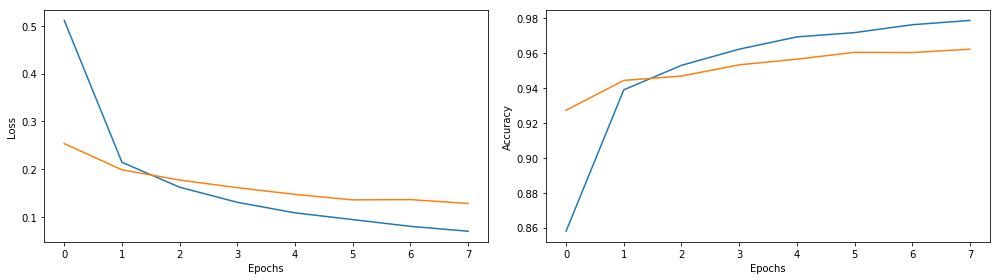

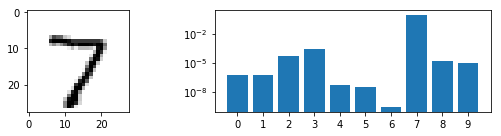

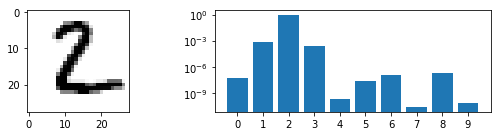

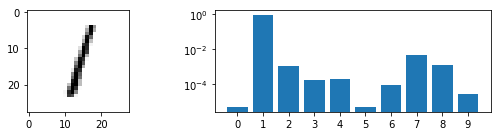

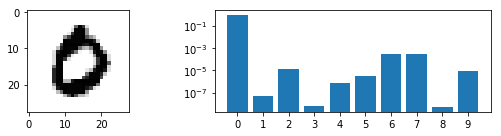

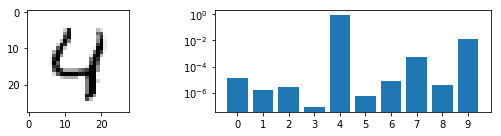

In [7]:
score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation');
plt.xlabel('Epochs')
plt.ylabel('Accuracy');
plt.tight_layout()

for i in range(5):
    X = x_test[i]
    probas = model.predict_proba(np.array([X]))
    plt.figure(figsize=(8,2))
    plt.subplot(1,2,1)
    plt.imshow(X.reshape(img_width,img_height),cmap=plt.cm.gray_r)
    plt.subplot(1,2,2)
    plt.bar(np.arange(10),probas[0],log=True)
    plt.xticks(np.arange(10))
    plt.tight_layout()
    plt.show()    

## La red no sabe distinguir imágenes aleatorias

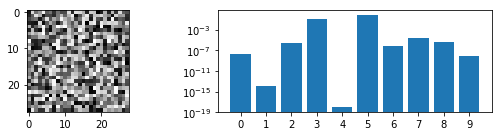

Max probability: 0.87718594


In [8]:
X = np.random.random((img_width, img_height)) * 0.2 + 0.5
X = X.reshape(1,img_height*img_width)
probas = model.predict_proba(np.array(X))
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.imshow(X.reshape(img_width,img_height),cmap=plt.cm.gray_r)
plt.subplot(1,2,2)
plt.bar(np.arange(10),probas[0],log=True)
plt.xticks(np.arange(10))
plt.tight_layout()
plt.show()
print('Max probability:',probas.max())

# Maximización de activación  <a name="ma"></a>

In [9]:
def activation_maximization(layer, neuron, step, iterations):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = model.layers[layer].output
    loss = layer_output[0][neuron]

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-15)

    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])

    # we start from a gray image with some noise
    input_img = np.random.random((img_width, img_height)) * 0.0 + 0.0
    input_img = input_img.reshape(1,img_height*img_width)

    # run gradient ascent for 20 steps
    step = 10**step
    for i in range(iterations):
        loss_value, grads_value = iterate(input_img)
        input_img += grads_value * step
    return input_img.reshape(img_width,img_height)

## Cuales son las imágenes de entrada que maximizan la activación de las neuronas de la capa 1

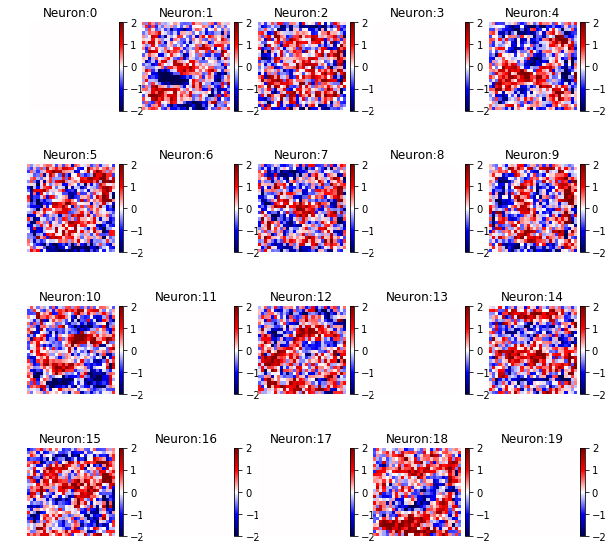

In [10]:
layer_number = 0
plt.figure(figsize=(10,10))
units = model.layers[layer_number].units
units = np.clip(units,0,20)
for i in range(units):
    X = activation_maximization(layer_number,i,-2,100)
    plt.subplot(4,5,i+1)
    im = plt.imshow(X,cmap=plt.cm.seismic,vmin=-2,vmax=2)
    plt.colorbar(im,fraction=0.046, pad=0.04);
    plt.axis('off')
    plt.title('Neuron:'+str(i))

## Cuales son las imágenes de entrada que maximizan la activación de las neuronas de la capa 2

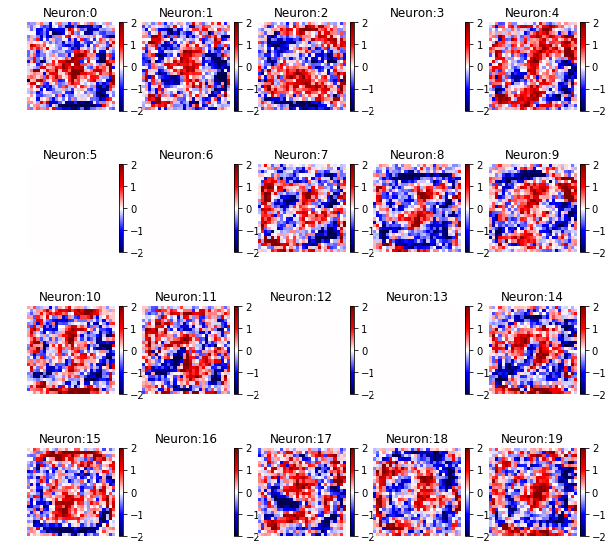

In [11]:
layer_number = 1
plt.figure(figsize=(10,10))
units = model.layers[layer_number].units
units = np.clip(units,0,20)
for i in range(units):
    X = activation_maximization(layer_number,i,-2,100)
    plt.subplot(4,5,i+1)
    im = plt.imshow(X,cmap=plt.cm.seismic,vmin=-2,vmax=2)
    plt.colorbar(im,fraction=0.046, pad=0.04);
    plt.axis('off')
    plt.title('Neuron:'+str(i))

## Cuales son las imágenes de entrada que maximizan la activación de las neuronas de la última capa

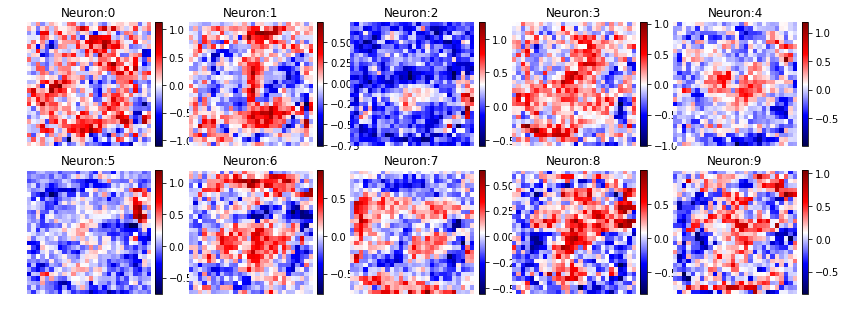

In [12]:
layer_number = 2
plt.figure(figsize=(14,5))
units = model.layers[layer_number].units
for i in range(units):
    X = activation_maximization(layer_number,i,-2,100)
    plt.subplot(2,5,i+1)
    im = plt.imshow(X,cmap=plt.cm.seismic)
    plt.colorbar(im,fraction=0.046, pad=0.04);
    plt.axis('off')
    plt.title('Neuron:'+str(i))

# MNIST Audio

# Data preparation

In [6]:
import librosa
import glob
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import set_random_seed
from IPython.display import Audio

def chunks(l, n):
    """ Yield n successive chunks from l.
    """
    newn = int(len(l) / n)
    for i in range(0, n-1):
        yield l[i*newn:i*newn+newn]
    yield l[n*newn-newn:]

In [13]:
num_classes = 10
data = []
X_clip = -50
X_max = 80

win_length = 1024
hop_length = 512

for filename in glob.glob('datasets/mnist-audio/*'):
    x, sr = librosa.load(filename, sr = None)
    x = x/np.abs(x).max()
    X = 10*np.log10(np.abs(librosa.stft(x, n_fft=win_length, win_length=win_length, hop_length=hop_length))**2)
    X = np.clip(X,X_clip,None)
    X = (X-X_clip)/X_max
    ll = list(chunks(list(range(X.shape[1])),3))
    X_mean = np.zeros(X.shape[0]*len(ll))
    for i,l in enumerate(ll):
        X_mean[i*X.shape[0]:(i+1)*X.shape[0]] = X[:,l].mean(1)
    y = int(Path(filename).stem[0])
    y_one_hot = keras.utils.to_categorical(y, num_classes)
    data.append({'y':y,'y_one_hot':y_one_hot,'X':X,'X_mean':np.hstack(X_mean),'shape':X.shape, 'x':x})
    
df = pd.DataFrame(data)

In [14]:
X = np.vstack(df.X_mean)
y = np.vstack(df.y_one_hot)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X.shape[1])

1539


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               788480    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 961,610
Trainable params: 961,610
Non-trainable params: 0
_________________________________________________________________


[0.6926950512510357, 0.7287879]

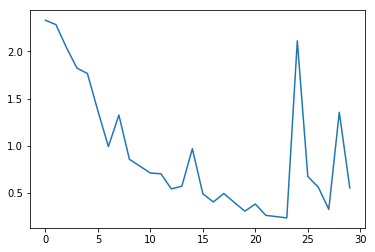

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0008),
              metrics=['accuracy'])

score = model.evaluate(X_test, y_test, verbose=0)
score

batch_size = 32
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,validation_split=.33)

plt.plot(history.history['loss'])
score = model.evaluate(X_test, y_test, verbose=0)
score

In [29]:
Audio(df.iloc[800].x,rate = 8000)

In [31]:
df.iloc[800].x

array([0.0020555 , 0.01027749, 0.        , ..., 0.05447071, 0.05960945,
       0.03802672], dtype=float32)

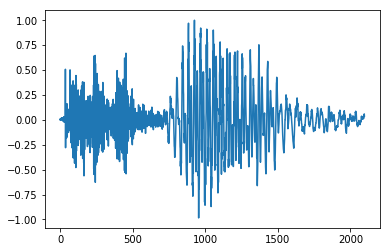

In [30]:
plt.plot(df.iloc[800].x)